# Relatório Simulação 1
## Lançamento Oblíquo de projétil
#### Bruno Hideki Amadeu Ogata RA: 140884
#### Camilo Maia Pires RA: 140473
#### Matheus Presotto Limonta RA: 140740
#### Victor Hugo Godoi Pedrota RA: 140698 


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math 

In [3]:
def lancamento( velocidade_incial = 100, g = -10, posinicialx = 0, posinicialy = 400, theta = 0, tempmax = 4,
                 massa = 10, coeficiente_atrito = 0, g_desloc = 0, g_vx = 0, g_vy = 0, g_ecin = 0, g_epot = 0):
    
    v_inicialx = velocidade_incial*math.cos(theta)
    v_inicialy = velocidade_incial*math.sin(theta)
    step = 0.01
    velocidadex = v_inicialx
    velocidadey = v_inicialy
    posx = posinicialx
    posy = posinicialy
    vetor_posx = []
    vetor_posy = []


    energia_potinicial =  massa*posinicialy*-g
    energia_cininicial = 0.5*massa*velocidade_incial*velocidade_incial
    energia_pot = [energia_potinicial]
    energia_cin = [energia_cininicial]
    energia_total = [energia_cininicial + energia_potinicial]


    vx = []
    vy = []
    tempo = [0]
    vetor_posx.append(posinicialx)
    vetor_posy.append(posinicialy)

    vx.append(v_inicialx)
    vy.append(v_inicialy)

    for t in  np.arange(0,tempmax, step):

        if(posy > 0): 
            velocidadex = velocidadex - coeficiente_atrito
            velocidadey = velocidadey + (g - coeficiente_atrito*velocidadey/massa)*step
            if (velocidadex < 0):
                velocidadex = 0;
            posx = posx + velocidadex
            posy = posy + velocidadey
        else:
            velocidadex = 0
            velocidadey = 0

        
            
        
        vx.append(velocidadex)
        vy.append(velocidadey)
        vetor_posx.append(posx)
        vetor_posy.append(posy)

        velocidade = math.sqrt(velocidadex*velocidadex + velocidadey*velocidadey) 

        energia_pot.append(massa*-g*posy)
        energia_cin.append(0.5*massa*velocidade*velocidade)
        energia_total.append(massa*(0.5*velocidade*velocidade + -g*posy))
        tempo.append(t)

            
    if g_desloc == 1: 
        plt.plot(vetor_posx,vetor_posy) 
        plt.xlabel('Posição em x')
        plt.ylabel('Posição em y')
    
    if g_vx == 1: 
        plt.plot(tempo, vx)
        plt.xlabel('Tempo')
        plt.ylabel('Velocidade em x')
    
    if g_vy == 1: 
        
        vy1 = list()
        for i in vy:
            vy1.append(i * -1)
            
        plt.plot(tempo, vy1)
        plt.xlabel('Tempo')
        plt.ylabel('Velocidade em y')

    if g_ecin == 1: 
        plt.plot(tempo, energia_cin)
        plt.xlabel('Tempo')
        plt.ylabel('Energia Cinética')

    if g_epot == 1: 
        plt.plot(tempo, energia_pot)
        plt.xlabel('Tempo')
        plt.ylabel('Energia Potencial')
    
    plt.show()



### 1. Modelo matemático

As seguintes equações descrevem o modelo matemático para essa simulação:   

$$
    V_x = Vx - K
    \\
    V_y = Vy + (\frac{g - K \times V_y}{m})
$$

### 2. Parâmetros de simulação
\
$V_0$ = Velociade inicial
\
\
$g$ = Aceleração da gravidade
\
\
$S_0$ = Altura inicial
\
\
$\theta$ = Ângulo de lançamento
\
\
$m$ = Massa do corpo
\
\
$k$ = Parâmetro de atrito

### 3. Simulações, gráficos e discussão
#### 3.1

#### Parâmetros padrão:
$V_0$ = 100
\
$G$ = -10
\
$S_0$ = 400
\
$\theta$ = 0
\
$m$ = 10
\
$k$ = 0

Nesta primeira simulação vemos o deslocamento da partícula, a partir dos parâmetros padrão acima. A velocidade no eixo x é constante até a partícula atingir o solo como mostrado no segundo gráfico, isso se dá devido a falta de atrito do ar (k = 0). Observando o terceiro gráfico, vemos que a velocidade em y aumenta uniformemente até a partícula atingir o solo.

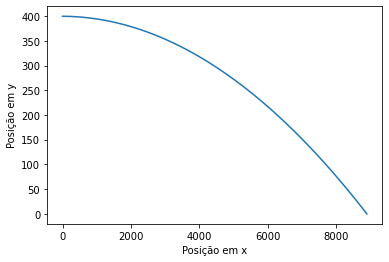

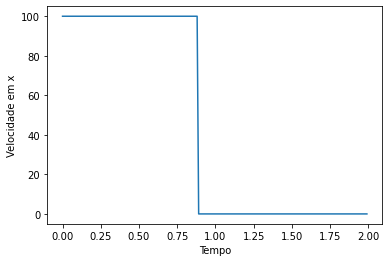

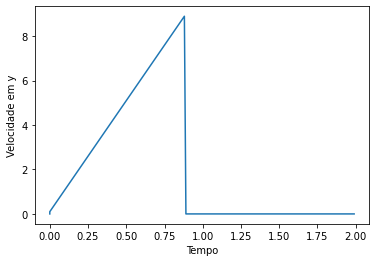

In [72]:
lancamento(g_desloc = 1)
lancamento(g_vx = 1, tempmax = 2)
lancamento(g_vy = 1, tempmax = 2)

### 3.2
#### Parâmetros modificados:

$k$ = 1.5

Com a inclusão do coeficiente de atrito, vemos no primeiro gráfico, que a partícula percorre uma distância menor quando em comparação com a simulação 3.1 onde k = 0, também ocorrem mudanças nos gráficos da velocidade em x e y, comparando os gráficos da velocidade em x de 3.1 e 3.2, vemos que ela vai diminuindo uniformemente até a particula atingir o solo, isso devido ao atrito com o ar. Agora comparando os graficos da velocidade em y vemos que ocorre mudança, a velocidade em y quando existe atrito do ar, alcança uma velocidade máxima menor em relação a quando não há atrito.

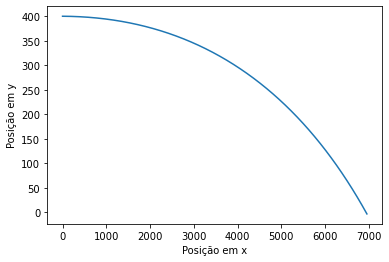

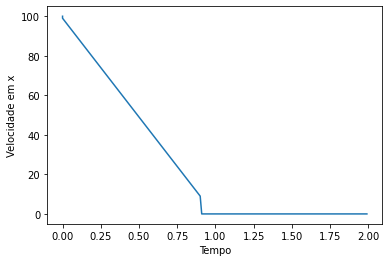

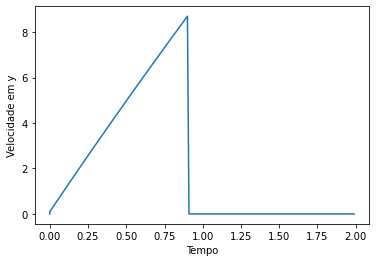

In [5]:
lancamento(g_desloc = 1, coeficiente_atrito = 0.5)
lancamento(g_vx = 1, tempmax = 2, coeficiente_atrito = 1)
lancamento(g_vy = 1, tempmax = 2, coeficiente_atrito = 1)

### 3.3
#### Parâmetros modificados:

$\theta$ = $\pi$/4
\
$k$ = 1.5

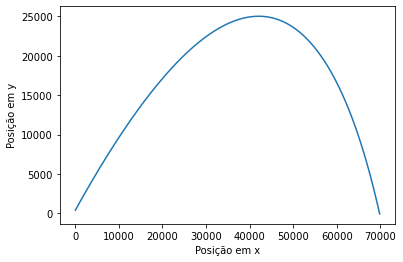

In [11]:
lancamento(g_desloc = 1, coeficiente_atrito = 0.03, theta = math.pi/4, tempmax = 30)

### 3.4
#### Parâmetros modificados:

$m$ = 20
\
$\theta$ = $\pi$/4
\
$k$ = 1.5

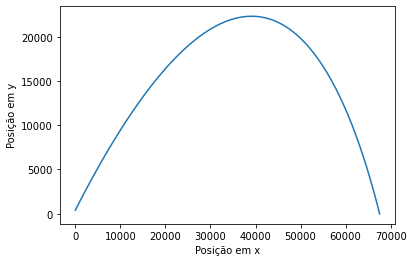

In [15]:
lancamento(g_desloc = 1, coeficiente_atrito = 0.03, theta = math.pi/4, tempmax = 30, massa = 1)

### 3.5
#### Parâmetros modificados:
\
$g$ = -1,8 (Gravidade na lua)
\
$m$ = 20
\
$\theta$ = $\pi$/4
\
$k$ = 0

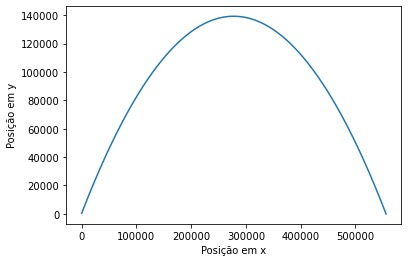

In [97]:
lancamento(g_desloc = 1, coeficiente_atrito = 0, theta = math.pi/4, tempmax = 3000, massa = 20, g = -1.8)